# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [9]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95
opt = [keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.SGD, keras.optimizers.Adam]

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    for optimizer in opt:
        print("Experiment with LR = %.6f , Optimizer = %s" % (lr, str(optimizer)))
#         opti = optimizer(lr=lr, nesterov=True, momentum=MOMENTUM)
        opti = optimizer(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opti)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s - optimizer- %s" % (str(lr), str(optimizer))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with LR = 0.100000 , Optimizer = <class 'keras.optimizers.RMSprop'>
Train on 50000 samples, validate on 

Epoch 7/20
50000/50000 [==============================] - 8s 155us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/20
50000/50000 [==============================] - 8s 152us/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/20
50000/50000 [==============================] - 7s 150us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/20
50000/50000 [==============================] - 8s 153us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 11/20
50000/50000 [==============================] - 8s 157us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 12/20
50000/50000 [==============================] - 8s 153us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 13/20
50000/50000 [==============================] - 8s 152us/step - loss: 2.3027 - accuracy: 0.0992 - 

50000/50000 [==============================] - 9s 177us/step - loss: 1.9074 - accuracy: 0.2938 - val_loss: 1.8799 - val_accuracy: 0.2938
Epoch 14/20
50000/50000 [==============================] - 9s 178us/step - loss: 1.8924 - accuracy: 0.2995 - val_loss: 2.1208 - val_accuracy: 0.2430
Epoch 15/20
50000/50000 [==============================] - 9s 179us/step - loss: 1.8847 - accuracy: 0.3037 - val_loss: 1.9294 - val_accuracy: 0.2932
Epoch 16/20
50000/50000 [==============================] - 9s 177us/step - loss: 1.8789 - accuracy: 0.3077 - val_loss: 2.0339 - val_accuracy: 0.2621
Epoch 17/20
50000/50000 [==============================] - 9s 180us/step - loss: 1.8717 - accuracy: 0.3097 - val_loss: 1.8638 - val_accuracy: 0.3190
Epoch 18/20
50000/50000 [==============================] - 9s 177us/step - loss: 1.8694 - accuracy: 0.3123 - val_loss: 1.8613 - val_accuracy: 0.3167
Epoch 19/20
50000/50000 [==============================] - 9s 179us/step - loss: 1.8577 - accuracy: 0.3180 - val_loss:

50000/50000 [==============================] - 10s 204us/step - loss: 1.7943 - accuracy: 0.3402 - val_loss: 1.8112 - val_accuracy: 0.3410
Epoch 6/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.7916 - accuracy: 0.3420 - val_loss: 1.8127 - val_accuracy: 0.3442
Epoch 7/20
50000/50000 [==============================] - 10s 204us/step - loss: 1.7932 - accuracy: 0.3410 - val_loss: 1.8181 - val_accuracy: 0.3345
Epoch 8/20
50000/50000 [==============================] - 10s 203us/step - loss: 1.7847 - accuracy: 0.3441 - val_loss: 1.8207 - val_accuracy: 0.3395
Epoch 9/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.7844 - accuracy: 0.3472 - val_loss: 1.7885 - val_accuracy: 0.3463
Epoch 10/20
50000/50000 [==============================] - 10s 204us/step - loss: 1.7714 - accuracy: 0.3512 - val_loss: 1.7782 - val_accuracy: 0.3490
Epoch 11/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.7759 - accuracy: 0.3500 - val_lo

50000/50000 [==============================] - 9s 181us/step - loss: 0.9918 - accuracy: 0.6477 - val_loss: 1.3707 - val_accuracy: 0.5270
Epoch 12/20
50000/50000 [==============================] - 9s 176us/step - loss: 0.9897 - accuracy: 0.6494 - val_loss: 1.3727 - val_accuracy: 0.5271
Epoch 13/20
50000/50000 [==============================] - 9s 170us/step - loss: 0.9879 - accuracy: 0.6504 - val_loss: 1.3712 - val_accuracy: 0.5281
Epoch 14/20
50000/50000 [==============================] - 9s 174us/step - loss: 0.9860 - accuracy: 0.6511 - val_loss: 1.3728 - val_accuracy: 0.5279
Epoch 15/20
50000/50000 [==============================] - 8s 166us/step - loss: 0.9840 - accuracy: 0.6510 - val_loss: 1.3732 - val_accuracy: 0.5284
Epoch 16/20
50000/50000 [==============================] - 9s 183us/step - loss: 0.9824 - accuracy: 0.6528 - val_loss: 1.3736 - val_accuracy: 0.5284
Epoch 17/20
50000/50000 [==============================] - 9s 174us/step - loss: 0.9807 - accuracy: 0.6533 - val_loss:

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 183us/step - loss: 1.9642 - accuracy: 0.2904 - val_loss: 1.8256 - val_accuracy: 0.3388
Epoch 2/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.7812 - accuracy: 0.3667 - val_loss: 1.7762 - val_accuracy: 0.3589
Epoch 3/20
50000/50000 [==============================] - 9s 187us/step - loss: 1.7010 - accuracy: 0.3982 - val_loss: 1.8445 - val_accuracy: 0.3518
Epoch 4/20
50000/50000 [==============================] - 9s 190us/step - loss: 1.6455 - accuracy: 0.4197 - val_loss: 1.6111 - val_accuracy: 0.4309
Epoch 5/20
50000/50000 [==============================] - 9s 189us/step - loss: 1.6067 - accuracy: 0.4322 - val_loss: 1.7404 - val_accuracy: 0.3759
Epoch 6/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.5717 - accuracy: 0.4455 - val_loss: 1.6403 - val_accuracy: 0.4347
Epoch 7/20
50000/50000 [==============================] - 9s 

50000/50000 [==============================] - 8s 158us/step - loss: 1.1512 - accuracy: 0.6026 - val_loss: 1.3152 - val_accuracy: 0.5350
Epoch 15/20
50000/50000 [==============================] - 8s 151us/step - loss: 1.1511 - accuracy: 0.6025 - val_loss: 1.3151 - val_accuracy: 0.5349
Epoch 16/20
50000/50000 [==============================] - 9s 174us/step - loss: 1.1510 - accuracy: 0.6023 - val_loss: 1.3151 - val_accuracy: 0.5347
Epoch 17/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.1509 - accuracy: 0.6029 - val_loss: 1.3151 - val_accuracy: 0.5353
Epoch 18/20
50000/50000 [==============================] - 8s 157us/step - loss: 1.1508 - accuracy: 0.6029 - val_loss: 1.3150 - val_accuracy: 0.5358
Epoch 19/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.1507 - accuracy: 0.6029 - val_loss: 1.3149 - val_accuracy: 0.5353
Epoch 20/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.1506 - accuracy: 0.6027 - val_loss:

50000/50000 [==============================] - 9s 181us/step - loss: 1.5873 - accuracy: 0.4504 - val_loss: 1.6127 - val_accuracy: 0.4314
Experiment with LR = 0.000010 , Optimizer = <class 'keras.optimizers.Adagrad'>
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.5759 - accuracy: 0.4554 - val_loss: 1.5908 - val_accuracy: 0.4430
Epoch 2/20
50000/50000 [==============================] - 9s 171us/step - loss: 1.5737 - accuracy: 0.4569 - val_loss: 1.5898 - val_accuracy: 0.4413
Epoch 3/20
50000/50000 [==============================] - 9s 170us/step - loss: 1.5729 - accuracy: 0.4568 - val_loss: 1.5895 - val_accuracy: 0.4425
Epoch 4/20
50000/50000 [==============================] - 8s 168us/step - loss: 1.5724 - accuracy: 0.4568 - val_loss: 1.5889 - val_accuracy: 0.4436
Epoch 5/20
50000/50000 [==============================] - 9s 171us/step - loss: 1.5720 - accuracy: 0.4572 - val_loss: 1.5888 - val_accuracy: 0

50000/50000 [==============================] - 10s 209us/step - loss: 1.4908 - accuracy: 0.4851 - val_loss: 1.5177 - val_accuracy: 0.4682
Epoch 13/20
50000/50000 [==============================] - 11s 210us/step - loss: 1.4850 - accuracy: 0.4878 - val_loss: 1.5138 - val_accuracy: 0.4658
Epoch 14/20
50000/50000 [==============================] - 10s 208us/step - loss: 1.4783 - accuracy: 0.4904 - val_loss: 1.5068 - val_accuracy: 0.4697
Epoch 15/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.4717 - accuracy: 0.4913 - val_loss: 1.5060 - val_accuracy: 0.4698
Epoch 16/20
50000/50000 [==============================] - 10s 203us/step - loss: 1.4666 - accuracy: 0.4940 - val_loss: 1.4970 - val_accuracy: 0.4731
Epoch 17/20
50000/50000 [==============================] - 10s 210us/step - loss: 1.4604 - accuracy: 0.4950 - val_loss: 1.4940 - val_accuracy: 0.4737
Epoch 18/20
50000/50000 [==============================] - 10s 207us/step - loss: 1.4552 - accuracy: 0.4983 - va

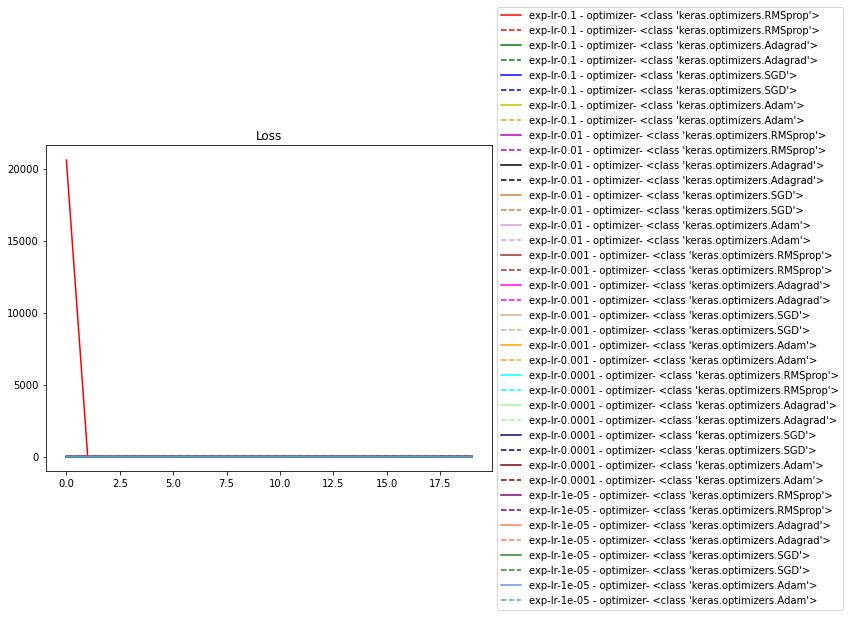

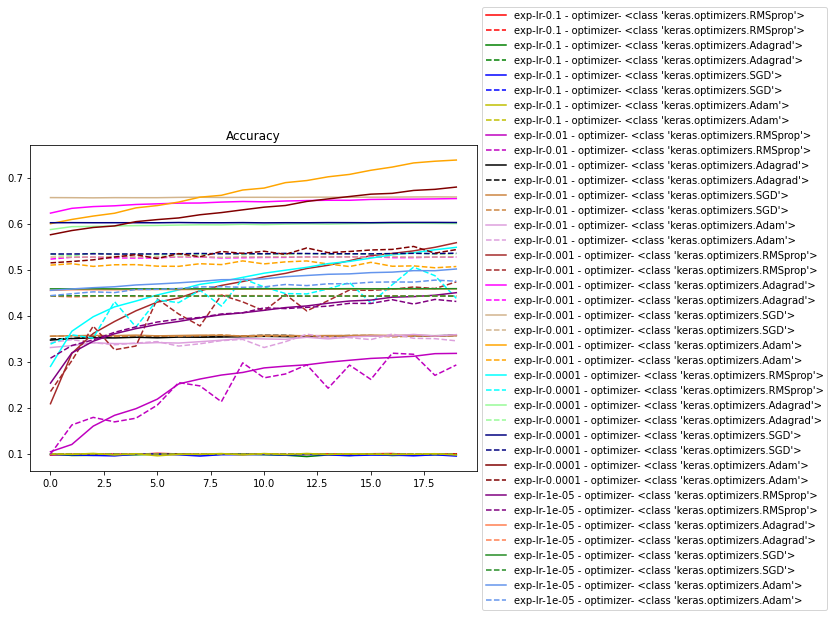

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "peru", "plum", "brown", "fuchsia", 
             "tan", "orange", "cyan", "palegreen", "navy", "maroon", "purple", "coral", "forestgreen", "cornflowerblue"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()